In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [347]:
data = pd.read_csv("HV.csv")

Features and Target variables

In [348]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_2W','%_of_3W','%_of_4W']].values
target = data['SD'].values

Normalize data

In [349]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [350]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Reshape the input data for all models

In [351]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [461]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

Epoch 1/800
3/3 [==============================] - 2s 103ms/step - loss: 419.8818 - val_loss: 438.0455
Epoch 2/800
3/3 [==============================] - 0s 17ms/step - loss: 418.2799 - val_loss: 436.2980
Epoch 3/800
3/3 [==============================] - 0s 16ms/step - loss: 416.7110 - val_loss: 434.1441
Epoch 4/800
3/3 [==============================] - 0s 17ms/step - loss: 414.4965 - val_loss: 431.2766
Epoch 5/800
3/3 [==============================] - 0s 16ms/step - loss: 411.7430 - val_loss: 427.2319
Epoch 6/800
3/3 [==============================] - 0s 17ms/step - loss: 407.4868 - val_loss: 421.2357
Epoch 7/800
3/3 [==============================] - 0s 17ms/step - loss: 401.5034 - val_loss: 411.7316
Epoch 8/800
3/3 [==============================] - 0s 16ms/step - loss: 391.9398 - val_loss: 395.6413
Epoch 9/800
3/3 [==============================] - 0s 17ms/step - loss: 375.1104 - val_loss: 366.5408
Epoch 10/800
3/3 [==============================] - 0s 17ms/step - loss: 347.7080

Visualize LSTM results

0.6424913158784824


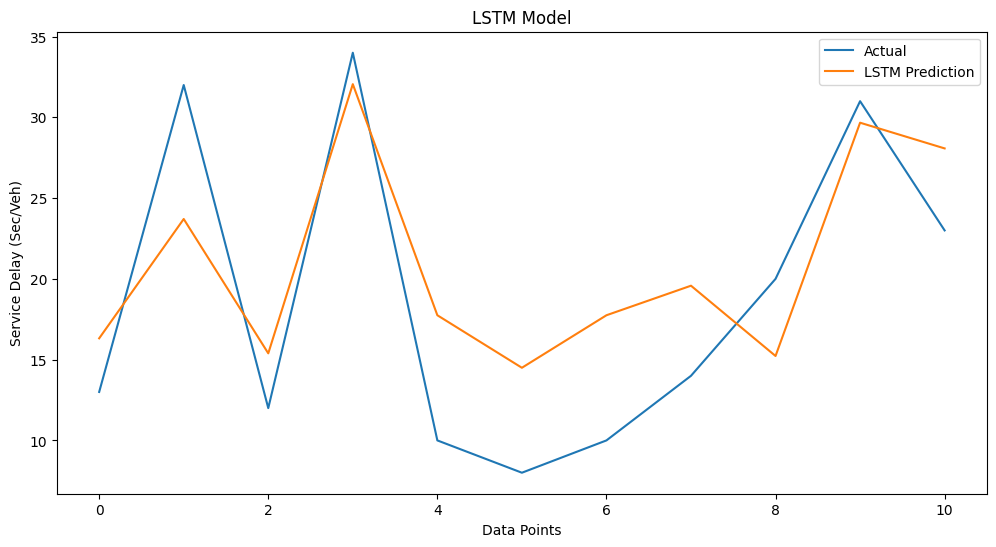

In [462]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [420]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=8, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/800
6/6 [==============================] - 3s 78ms/step - loss: 419.6041 - val_loss: 436.0225
Epoch 2/800
6/6 [==============================] - 0s 10ms/step - loss: 414.5178 - val_loss: 428.5236
Epoch 3/800
6/6 [==============================] - 0s 9ms/step - loss: 405.4623 - val_loss: 411.8623
Epoch 4/800
6/6 [==============================] - 0s 9ms/step - loss: 384.6322 - val_loss: 363.8551
Epoch 5/800
6/6 [==============================] - 0s 9ms/step - loss: 305.8461 - val_loss: 176.8858
Epoch 6/800
6/6 [==============================] - 0s 10ms/step - loss: 121.6541 - val_loss: 120.1544
Epoch 7/800
6/6 [==============================] - 0s 9ms/step - loss: 72.4963 - val_loss: 94.6330
Epoch 8/800
6/6 [==============================] - 0s 10ms/step - loss: 131.3069 - val_loss: 142.6738
Epoch 9/800
6/6 [==============================] - 0s 10ms/step - loss: 153.0628 - val_loss: 134.9735
Epoch 10/800
6/6 [==============================] - 0s 8ms/step - loss: 132.2769 - val_l

Visualize BiLSTM results

0.7648643051304749


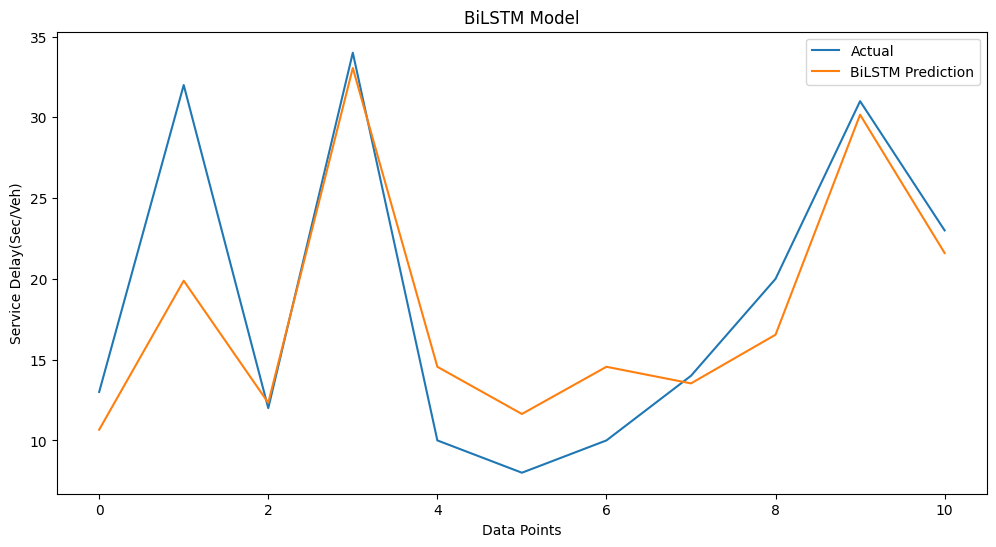

In [421]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

0.7648643051304749


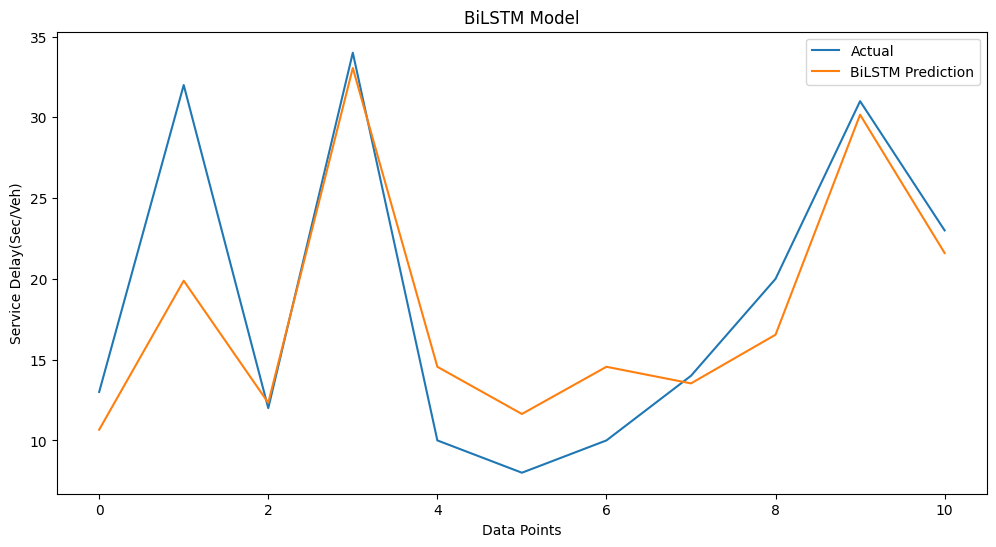

In [422]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [463]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=600, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/600
2/2 [==============================] - 2s 241ms/step - loss: 419.4495 - val_loss: 437.1156
Epoch 2/600
2/2 [==============================] - 0s 19ms/step - loss: 417.5341 - val_loss: 435.2959
Epoch 3/600
2/2 [==============================] - 0s 20ms/step - loss: 415.8193 - val_loss: 433.3029
Epoch 4/600
2/2 [==============================] - 0s 24ms/step - loss: 413.9143 - val_loss: 431.0130
Epoch 5/600
2/2 [==============================] - 0s 30ms/step - loss: 411.7352 - val_loss: 428.3034
Epoch 6/600
2/2 [==============================] - 0s 31ms/step - loss: 408.9617 - val_loss: 425.0456
Epoch 7/600
2/2 [==============================] - 0s 15ms/step - loss: 405.8951 - val_loss: 421.0226
Epoch 8/600
2/2 [==============================] - 0s 18ms/step - loss: 402.1155 - val_loss: 416.0005
Epoch 9/600
2/2 [==============================] - 0s 34ms/step - loss: 397.1768 - val_loss: 409.6789
Epoch 10/600
2/2 [==============================] - 0s 30ms/step - loss: 390.9595

Visualize GRU results

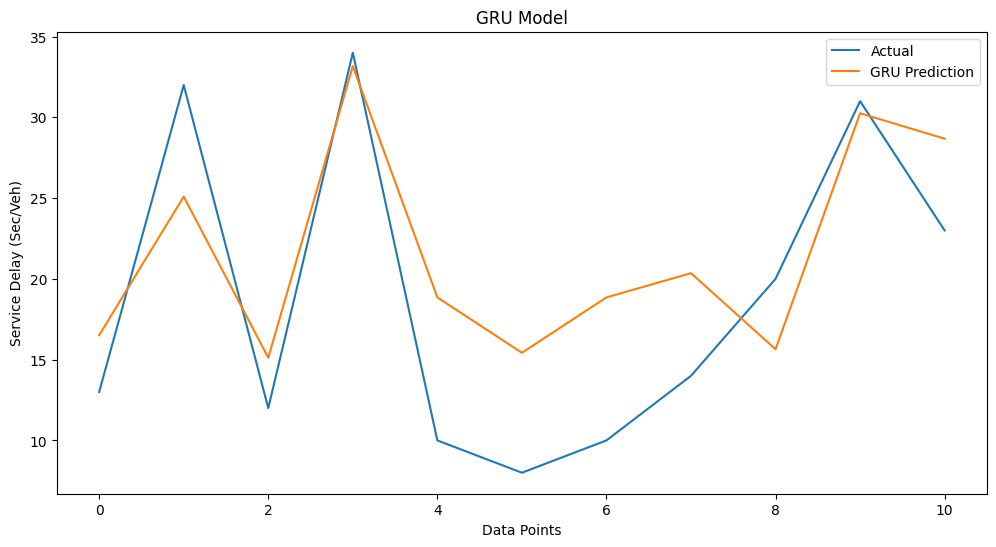

In [464]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [429]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=600, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/600
3/3 [==============================] - 3s 200ms/step - loss: 420.3584 - val_loss: 435.8998
Epoch 2/600
3/3 [==============================] - 0s 16ms/step - loss: 415.6702 - val_loss: 431.1034
Epoch 3/600
3/3 [==============================] - 0s 20ms/step - loss: 410.8519 - val_loss: 425.3582
Epoch 4/600
3/3 [==============================] - 0s 15ms/step - loss: 404.6974 - val_loss: 417.5739
Epoch 5/600
3/3 [==============================] - 0s 16ms/step - loss: 396.9905 - val_loss: 406.6635
Epoch 6/600
3/3 [==============================] - 0s 14ms/step - loss: 385.5309 - val_loss: 390.7677
Epoch 7/600
3/3 [==============================] - 0s 17ms/step - loss: 368.7627 - val_loss: 367.0044
Epoch 8/600
3/3 [==============================] - 0s 15ms/step - loss: 342.7491 - val_loss: 329.9554
Epoch 9/600
3/3 [==============================] - 0s 17ms/step - loss: 303.7307 - val_loss: 270.3290
Epoch 10/600
3/3 [==============================] - 0s 14ms/step - loss: 240.1641

Visualize BiGRU results

0.7782332438555705


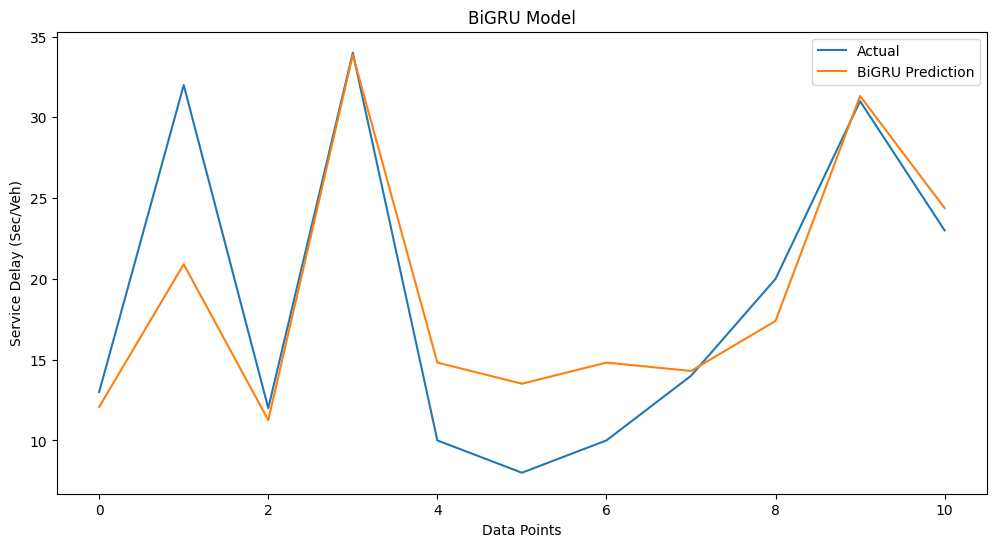

In [430]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [465]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=800, batch_size=16, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

Epoch 1/800
3/3 [==============================] - 0s 52ms/step - loss: 419.8636 - val_loss: 432.9735
Epoch 2/800
3/3 [==============================] - 0s 8ms/step - loss: 411.6699 - val_loss: 424.5107
Epoch 3/800
3/3 [==============================] - 0s 18ms/step - loss: 404.4431 - val_loss: 416.1258
Epoch 4/800
3/3 [==============================] - 0s 15ms/step - loss: 396.7179 - val_loss: 406.8870
Epoch 5/800
3/3 [==============================] - 0s 9ms/step - loss: 387.5421 - val_loss: 396.1949
Epoch 6/800
3/3 [==============================] - 0s 10ms/step - loss: 377.9046 - val_loss: 383.7332
Epoch 7/800
3/3 [==============================] - 0s 17ms/step - loss: 365.8407 - val_loss: 369.4113
Epoch 8/800
3/3 [==============================] - 0s 15ms/step - loss: 351.3134 - val_loss: 352.9101
Epoch 9/800
3/3 [==============================] - 0s 15ms/step - loss: 335.0719 - val_loss: 333.9385
Epoch 10/800
3/3 [==============================] - 0s 9ms/step - loss: 317.4923 - v

Visualize CNN results

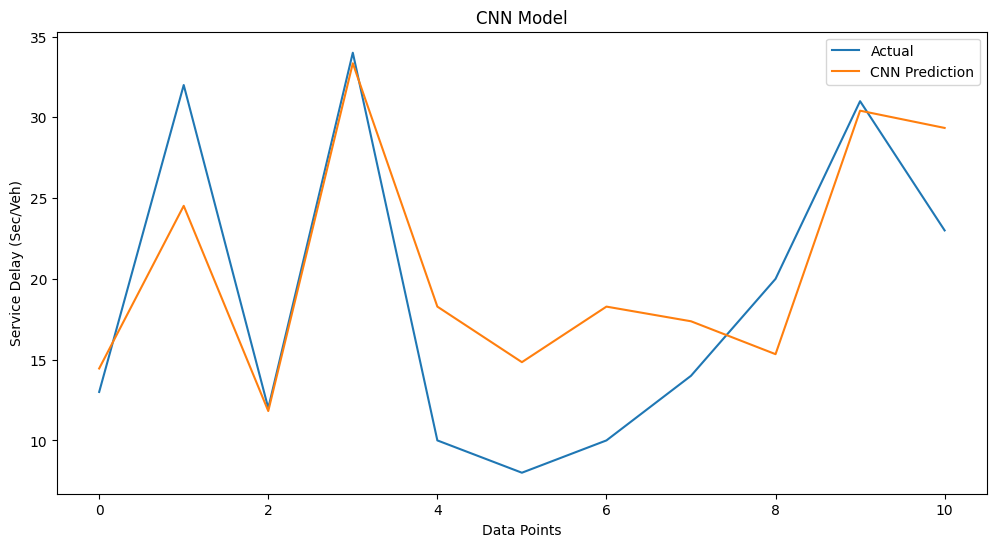

In [466]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [450]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/800
3/3 [==============================] - 1s 84ms/step - loss: 419.0798 - val_loss: 436.8783
Epoch 2/800
3/3 [==============================] - 0s 18ms/step - loss: 417.0553 - val_loss: 434.6221
Epoch 3/800
3/3 [==============================] - 0s 15ms/step - loss: 414.9093 - val_loss: 432.0708
Epoch 4/800
3/3 [==============================] - 0s 9ms/step - loss: 412.4565 - val_loss: 428.9981
Epoch 5/800
3/3 [==============================] - 0s 8ms/step - loss: 409.4558 - val_loss: 425.1114
Epoch 6/800
3/3 [==============================] - 0s 11ms/step - loss: 405.5110 - val_loss: 419.9610
Epoch 7/800
3/3 [==============================] - 0s 17ms/step - loss: 400.3181 - val_loss: 412.9463
Epoch 8/800
3/3 [==============================] - 0s 17ms/step - loss: 393.3117 - val_loss: 403.1763
Epoch 9/800
3/3 [==============================] - 0s 17ms/step - loss: 383.2195 - val_loss: 389.1808
Epoch 10/800
3/3 [==============================] - 0s 15ms/step - loss: 370.1292 - 

Visualize CNN_LSTM results

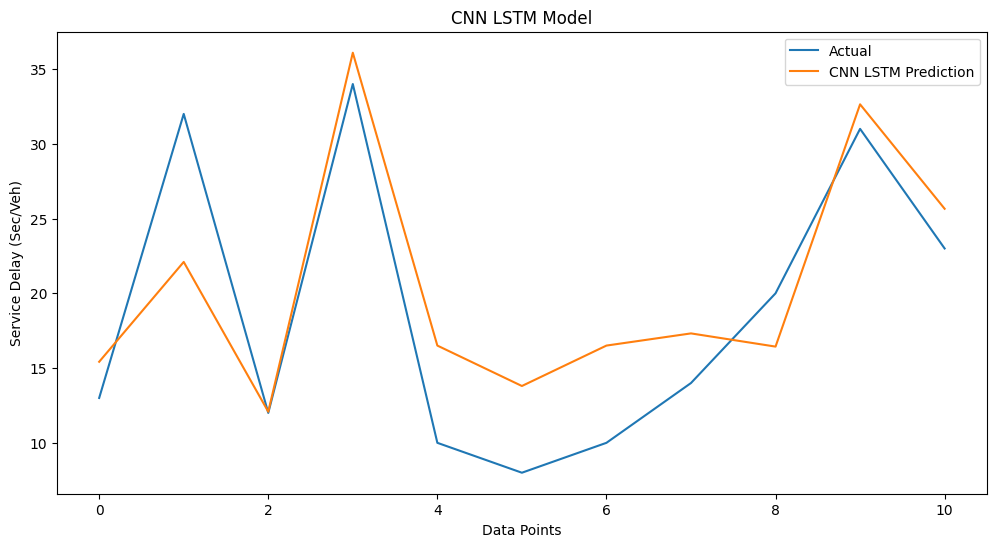

In [451]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [452]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=8, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/800
6/6 [==============================] - 2s 60ms/step - loss: 418.5857 - val_loss: 434.5871
Epoch 2/800
6/6 [==============================] - 0s 7ms/step - loss: 413.7804 - val_loss: 428.4614
Epoch 3/800
6/6 [==============================] - 0s 7ms/step - loss: 407.3620 - val_loss: 418.7409
Epoch 4/800
6/6 [==============================] - 0s 5ms/step - loss: 396.0190 - val_loss: 401.1228
Epoch 5/800
6/6 [==============================] - 0s 7ms/step - loss: 376.7050 - val_loss: 365.7196
Epoch 6/800
6/6 [==============================] - 0s 7ms/step - loss: 331.0880 - val_loss: 288.0542
Epoch 7/800
6/6 [==============================] - 0s 7ms/step - loss: 238.4660 - val_loss: 129.3907
Epoch 8/800
6/6 [==============================] - 0s 7ms/step - loss: 90.3985 - val_loss: 64.3641
Epoch 9/800
6/6 [==============================] - 0s 9ms/step - loss: 80.7467 - val_loss: 80.2279
Epoch 10/800
6/6 [==============================] - 0s 7ms/step - loss: 53.1696 - val_loss: 40

Visualize CNN_BiLSTM results

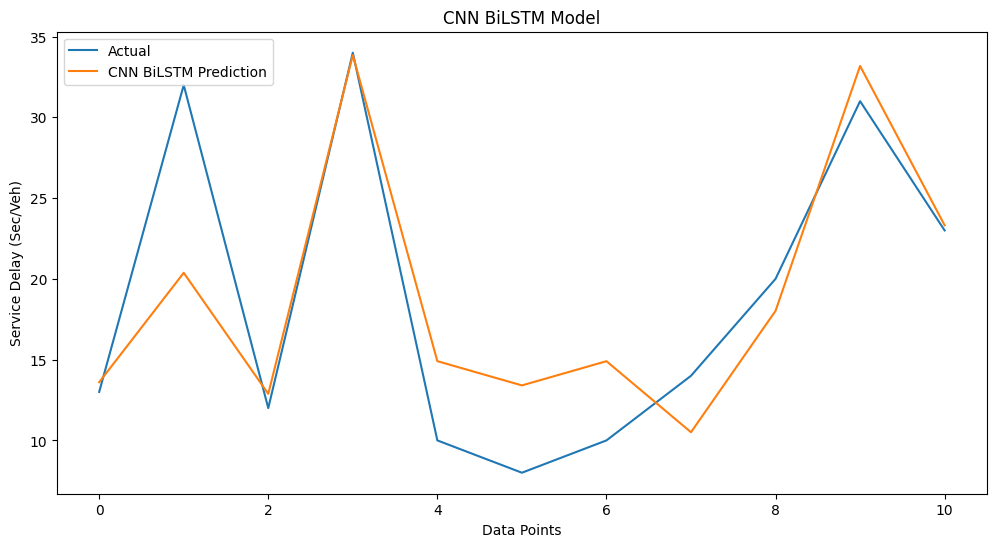

In [453]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [467]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

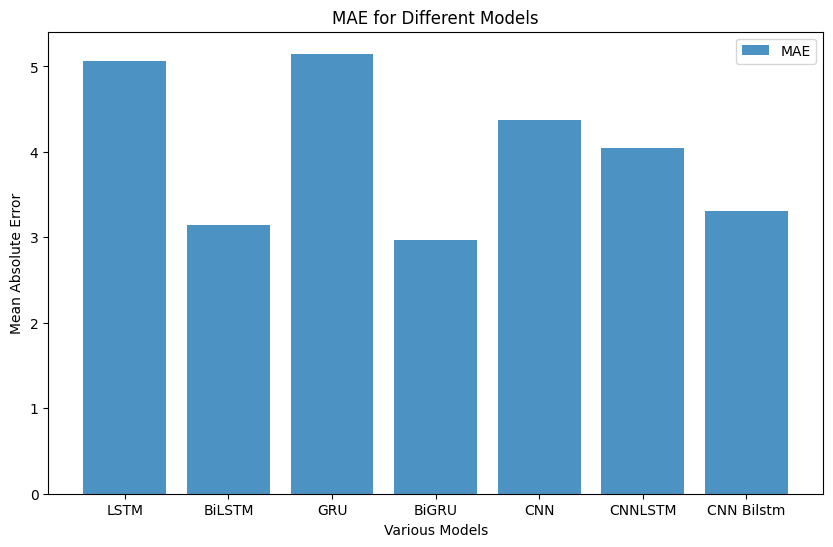

In [468]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

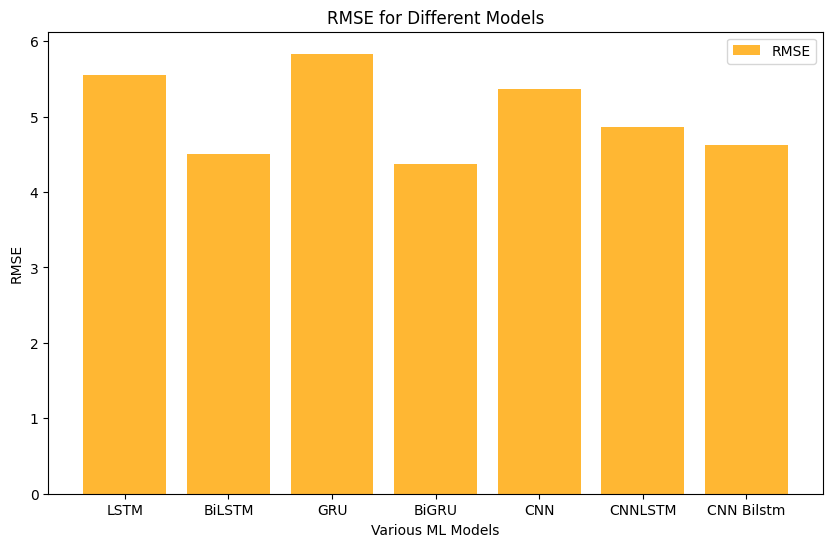

In [469]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

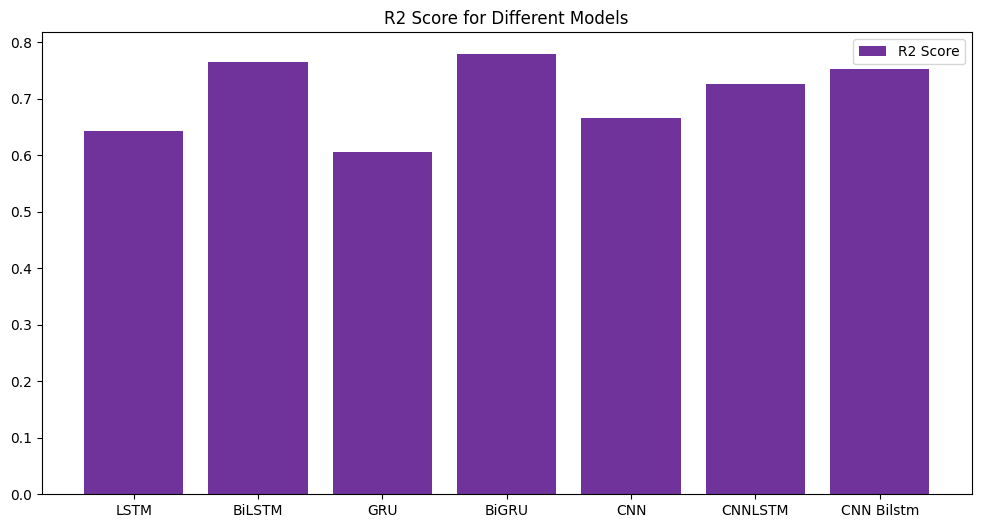

In [470]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [472]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 5.0637383894486865
LSTM MSE: 5.549678364057247
LSTM R2 Score: 0.6424913158784824

BiLSTM MAE: 3.149235725402832
BiLSTM MSE: 4.50073867520419
BiLSTM R2 Score: 0.7648643051304749

GRU MAE: 5.148527752269398
GRU MSE: 5.834514274044475
GRU R2 Score: 0.6048514606199659

BiGRU MAE: 2.9674324555830522
BiGRU MSE: 4.370918796360361
BiGRU R2 Score: 0.7782332438555705

CNN MAE: 4.376766551624645
CNN MSE: 5.362036684607607
CNN R2 Score: 0.6662582572662696

CNN LSTM MAE: 4.0443314639004795
CNN LSTM MSE: 4.861838526388031
CNN LSTM R2 Score: 0.7256202670129333

CNN BiLSTM MAE: 3.313084515658292
CNN BiLSTM MSE: 4.618280139765875
CNN BiLSTM R2 Score: 0.7524223057010683


Plot predictions for each model

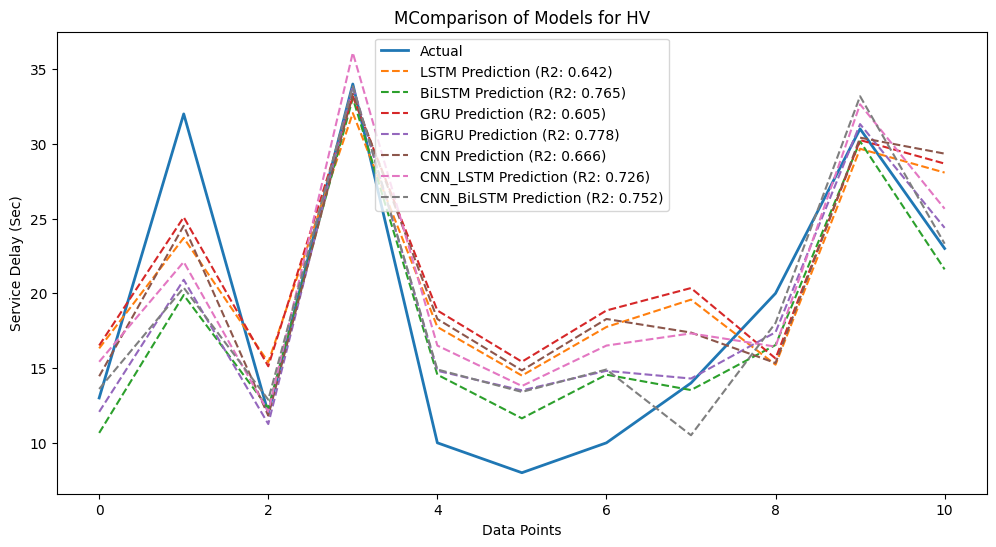

In [473]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('MComparison of Models for HV')
plt.show()

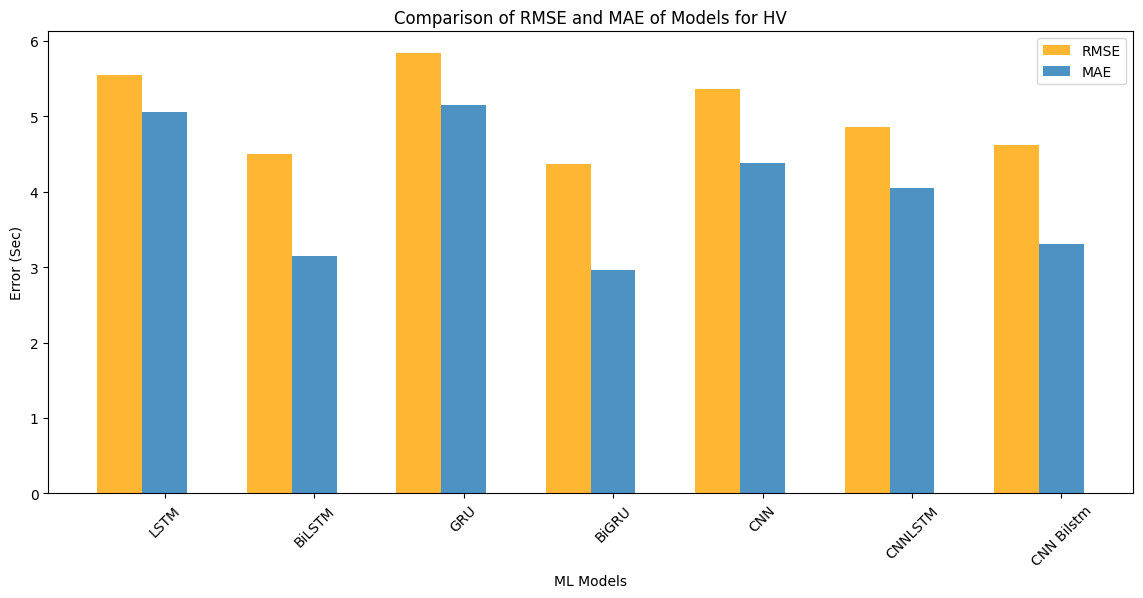

In [474]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE of Models for HV')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()